# 5.3. Ejemplo 3. Estructura de Bandas y Densidad de Estados para celda de silicio.

La estructura de bandas del silicio cristalino (estructura tipo diamante), es bien conocida, por lo en este notebook se utilizará dicho sistema como ejemplo para obtener con QE una estructura de bandas de un material semiconductor, así como su densidad de estados (DOS). El ejercicio está dividido en 4 partes:

0. **Ejercicio 4** de convergencia de *ecutwfc* y *kpoints* para el Si.
1. Cálculo de SCF.
2. Cálculo de bandas y post procesamiento de bandas.
3. **Ejercicio 5**, cálculo de densidad de estados y post procesamiento. 

## 2. SCF

Generar un archivo de entrada para correr un cálculo tipo "*scf*". Con los resultados del $\textbf{ejercicio 4}$ -de convergencia-, sustituir el $\textit{ecutwfc}$ y la red de $\textit{k-points}$ adecuada en el siguiente archivo y generamos el archivo de entrada para el cálculo de autoconsistencia o $\textit{scf}$. 

E.g.:

$
&control
    calculation='scf'
    pseudo_dir = '/qe-6.3/pseudo/',
    outdir='.',
    prefix='si'
 /
 &system
    ibrav=  2, celldm(1) =10.20, nat=  2, ntyp= 1,
    ecutwfc =18.0, nbnd = 10,
 /
 &electrons
    diagonalization='david'
 /
ATOMIC_SPECIES
 Si  28.086  Si.pz-vbc.UPF
ATOMIC_POSITIONS
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS {automatic} 
8 8 8 1 1 1
$


Utilizando la red de Bravais $\textbf{fcc}$ (que en QE corresponde a $\textit{ibrav = 2}$), colocando 2 átomos de de silicio en las posiciones indicadas, se reproduce la estructura tipo diamante del silicio:

In [2]:
% more SiBandStructure/Si.in

Con el siguiente comando escrito en la terminal se puede ver la estructura con el software XCrysDen:
*xcrysden --pwi Si.in*.
O bien, abriendo *XcrystDen* y desde ahi, abriendo el archivo $\textbf{Si.in}$.

La estructura en su plano XY y una vision en perspectiva es la siguiente:

<tr>
<td> <img src="./Si-bands-dos/Sixy.png" style="width: 300px"> 
<td> <img src="./Si-bands-dos/Siiso.png" style="width: 300px">
<tr>

**Figura:** Visualización de la estructura de silicio tipo diamante con *XCrySDen*.

Para correr este *input* utilizamos el mismo ejecutable $\textbf{pw.x}$ que ya introdujimos en la sección anterior:

In [9]:
!mpirun --np 2 /qe-6.3/bin/pw.x < ./SiBandStructure/Si.in > ./SiBandStructure/Si.out

Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


## 3. Estructura de bandas
En el archivo de salida podemos observar variables como la energía total del sistema, el número de $\textit{kpoints}$ utilizados, etc.
Sin embargo ahora nos interesa graficar la estructura de bandas del silicio, para lo cual se requiere modificar el archivo $\textbf{Si.in}$ y generar un archivo suplementario $\textbf{bandas.in}$.

En el archivo *Si.in* se cambia el cálculo de *scf* a *bands* y se modifica la sección de los *K_POINTS* de la siguiente manera.


$
&control
    calculation='bands'
    pseudo_dir = '/qe-6.3/pseudo/',
    outdir='.',
    prefix='si'
 /
 &system
    ibrav=  2, celldm(1) =10.20, nat=  2, ntyp= 1,
    ecutwfc =18.0, nbnd = 10,
 /
 &electrons
    diagonalization='david'
 /
ATOMIC_SPECIES
 Si  28.086  Si.pz-vbc.UPF
ATOMIC_POSITIONS
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS {crystal_b} 
6
  0.50  0.25  0.75  30 !W
  0.00  0.00  0.00  30 !G
  0.50  0.00  0.50  30 !X
  0.50  0.25  0.75  30 !W
  0.50  0.50  0.50  30 !L
  0.00  0.00  0.00  30 !G
$

La sección de los *k-points*, indicando las coordenadas en la red recíproca de 6 de ellos, responde a que la trayectoria entre estos - W, $\Gamma$, X, L y gregresando a $\Gamma$-, es una trayectoria de alta simetría como se aprecia en la siguiente figura. Las trayectorias de alta simetría contienen información de máximos y mínimos de bandas del sistema. 

<tr>
<td> <img src="./Si-bands-dos/fcc-RLC.PNG" style="width: 300px">
<img src="./Si-bands-dos/fcc-RLC-path.PNG" style="width: 400px">
<tr>

**Figura.** Espacio recíproco de la celda de silicio, puntos y trayectoría de alta simetría.  Ref: [Sertwayan et. al 2010.](Sertwayan_Curtarolo_CMS2010.pdf) Además de esta referencia, puede ser de utilidad la siguiente página web: http://lampx.tugraz.at/~hadley/ss1/bzones/fcc.php en donde también se muestra la red reciproca, la celda de Brillouin de la celda fcc.

Con lo cual especificamos que se realizará un cálculo de los eigenvalores para cada bandas específicamente en el recorrido indicado, del punto W al $\Gamma$, X, W, L y $\Gamma$. Es importante cambiar *{automatic}* a *{crystal_b}* e indicar tanto el número de puntos de alta simetría, como el número de puntos con el que se mapeará la trayectoria lineal en el espacio recíproco entre ellos -30 puntos-. 

Teniendo esto, se corre la instrucción:

In [13]:
!mpirun --np 2 /qe-6.3/bin/pw.x < ./SiBandStructure/Si.in > ./SiBandStructure/Sibands.out

Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Esto genera las funciones de onda en los kpoints indicados, para este caso cerca de 150 funciones de onda (que se guardan en la carpeta si.save). 
Posteriormente corremos la siguiente instrucción con el archivo de PP bands.in

$
&BANDS
prefix="si"
outdir='.'
filband="Bandx.dat"
/
$


In [14]:
!mpirun --np 4 /qe-6.3/bin/bands.x < ./SiBandStructure/bands.in> ./SiBandStructure/Bands.out

Note: The following floating-point exceptions are signalling:Note: The following floating-point exceptions are signalling: IEEE_OVERFLOW_FLAG IEEE_DENORMAL
 IEEE_OVERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_OVERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_OVERFLOW_FLAG IEEE_DENORMAL


Esto genera varios archivos: si.xml, 4 archivos si.wfc# -por haber utilizado 4 procesadores-, archivos que contienen fnciones de onda, Bandx.dat.gnu, Bandx.dat, Bandx.dat.rap y una carpeta si.save que contiene archivos wfc#.dat con información de la función de onda, así como los archivos charge-density.dat, data-file.schema.xml y Si.pz-vbc.UPF. Toda esta inormación permite hacer análisis muy detallados de las las diferentes bandas, densidades electrónicas, etc. 

En particular el archivo $\textbf{Bandx.dat.gnu}$, es de gran utilidad para hacer gráficas de estructura de bandas. Es un archivo de 2 columnas y una serie de bloques en donde la primera columna representa el recorrido que fijamos en el espacio recíproco ($\textit{kpoints}$) y la segunda columna, cada una de las bandas, ordenadas de la más negativa o interna, cercana a los núcleos, hasta la más externa o lejana en la banda de conducción. 
Dicho documento puede graficarse rapidamente, *x* vs *y*, de la siguiente manera.

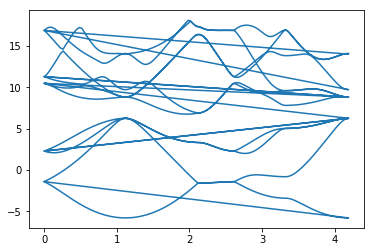

In [15]:
import pandas as pd #importar libreria para trabajar con data frames. 
import numpy as np #importar librería para trabajar vectores y matrices. Su objeto mas importante es el Array
import matplotlib.pyplot as plt
import pylab

%matplotlib inline

bsgnu = pd.read_table('./Bandx.dat.gnu',delim_whitespace=True, names=('kpoint', 'eigen')) #Leer el archibo Bandx.dat.gnu y asignarlo a una tabla

#bs 

bsdata=pd.DataFrame(bsgnu) # definimos un data frame para hacer operaciones

filas=bsdata.shape[0] #numero de filas

i=1     #para obtener el número de kpoints contamos hasta que encontremos otro igual al primero
kpoint1=bsdata.loc[0,'kpoint']
while bsdata.loc[i,'kpoint']!=kpoint1:
    i=i+1  
N_kps=i      #numero de kpoints
Nbands=filas/N_kps    #numero de bandas

bsdata.loc[[],['kpoint','eigen']]
plt.plot(bsdata['kpoint'],bsdata['eigen'])
#bs[[]]


En la gráfica de arriba se observa una  estructura de bandas adecuada correcta, pero con el siguiente código en Phyton se puede obtener una gráfica más clara, la típica gráfica de estructura de bandas del silicio.

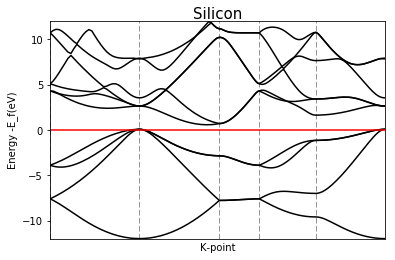

In [17]:
# Este texto fue escrito por Levi Lentz en MIT y modificado por Felipe Cervantes de Ibero.

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import pylab
import sys

#Función para obtener los puntos de alta simetria del archivo *.out.
def Symmetries(fstring): 
    f = open(fstring,'r')
    x = np.zeros(0)
    for i in f:
        if "high-symmetry" in i:
            x = np.append(x,float(i.split()[-1]))
    f.close()
    return x
# Esta función lee el archivo *.dat.gnu, se le da una energía de fermi, lee el archivo de simetría y un "nombre"
# Extrae los datos de las bandas del archivo *.dat.gnu  y grafica las bandas, con un shift dejando el cero en la 
#energía de fermi y marca los puntos kpoints de alta simetría.

def bndplot(datafile,fermi,symmetryfile,label):
    z = np.loadtxt(datafile) #se asigna a z el archivo Bandx.dat.gnu 
    x = np.unique(z[:,0]) # Lee y asigna a x todos los puntos kpoints unicos. 
    bands = []   # generamos un arreglo vacío
    bndl = len(z[z[:,0]==x[1]]) # Se define el número de bandas como longitud de las veces en que los kpoints se repiten
    Fermi = float(fermi)       # Cambiar Fermi a float
    z[:,1]=z[:,1]-Fermi     # restamos Fermi para tener Fermi en cero
    axis = [min(x),max(x),-12, 12]  #definimos los ejes. 
    for i in range(0,bndl):    
        bands.append(np.zeros([len(x),2])) # Generamos una matriz de ceros donde se almacenarán las bandas 
    for i in range(0,len(x)):
        sel = z[z[:,0] == x[i]]  # Aquí estan las energías para un punto x de los kpoints
        for j in range(0,bndl): # Este ciclo separa las cada una de las bandas en j valores
            bands[j][i][0] = x[i]
            bands[j][i][1] = np.multiply(sel[j][1],1)  #bands[j][i][k] para k = 0 , bands[j][n]==bands[j][m], el resultado es un kpoint
                                                        # para k = 1, j e i definen la banda y el kpoint, el resultado es un eigenvalor. 
    fff=np.shape(bands)
    for i in bands: # Aquí se grafican las bandas
        plt.plot(i[:,0],i[:,1],color="black")
    temp = Symmetries(symmetryfile) # Se llama a la función que busca puntos de alta simetria kpoints.
    for j in temp: # En este ciclo se grafican las lineas tenues para los puntos 
        x1 = [j,j]
        x2 = [axis[2],axis[3]]
        plt.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    plt.plot([min(x),max(x)],[Fermi-Fermi,Fermi-Fermi],color='red',)
    plt.xlabel('K-point')
    plt.ylabel('Energy -E_f(eV)')
    plt.ylim([axis[2],axis[3]])
    plt.xlim([axis[0],axis[1]])
    plt.xticks([])
    plt.text((axis[1]-axis[0])/2.0,axis[3]+0.8,label,va='center',ha='center',fontsize=15)
    plt.show()

#! Importante incluir en la siguiente línea los datos de entrada de la función bndplot
bndplot('./Bandx.dat.gnu',6.1673,'./SiBandStructure/Bands.out','Silicon')

En este caso la estructura de está graficada con un corrimiento de la Energía de Fermi a cero, se marcan con lineas punteadas los puntos *kpoints* de alta simetría e indicamos los ejes y el título. 
Dicha gráfica se puede comparar con las reportadas en la [literatura](http://cmt.dur.ac.uk/sjc/thesis/thesis/node39.html).

## 4. *Density of States DOS* del silicio.

Al igual que para obtener la estructura de bandas, el procedimiento para obtener la densidad de estados involucra un post-procesamiento de los datos. 

El último **ejercicio 5** de este documento es graficar la densidad de estados del silicio, a continuación se proporcionan algunos *hints*.

* Con calculation: *nscf* y una malla de kpoint densa, correr:
    * mpirun --np 2 /qe-6.3/bin/pw.x < si-test3.dos.in > si-test3.dos.out

* Construir un archivo auxiliar $\textbf{dos.in}$

$
&DOS
  outdir='.',
  prefix='si',
  Emin=-10,
  Emax=20,
  DeltaE=0.05,
  fildos='si',
/
$

* Correr el archivo auxiliar con el código de PP dos.x:
    * mpirun --np 2 /qe-6.3/bin/dos.x < dos.in > si-dos



**Nota:**

Para estructuras con polarización de spin, es necesario incluir una instrucción extra en el archivo **bands.in**: *spin_component=1*, realizar el cálculo de postprocesamiento y luego repetir para *spin_component=2*. Los resultados se deben salvar en archivos independientes para poder posteriormente tener los archivos correspondientes a *spin up* y *spin down*, 1 y 2 respectivamente. (PP/Docs/INPUT_BANDS.txt).


[Ir al notebook anterior.](SiRelax.ipynb)
